In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/all-data.csv', delimiter=',', encoding='latin-1', header=None)

df.columns = ['Sentiment', 'Message']

In [ ]:
display(df)


,Sentiment,Message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
display(df.head(5))

,Sentiment,Message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


##Encoding

In [ ]:

index = {"negative":0,"positive":2,"neutral":1}
df['Sentiment'] = [index[i] for i in df['Sentiment']]

In [ ]:
df

,Sentiment,Message
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...
4842,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...
4844,0,Net sales of the Paper segment decreased to EU...


##TOKENIZATION

In [ ]:
df['Message']=[i.lower() for i in df['Message']]

In [ ]:
df

,Sentiment,Message
0,1,"according to gran , the company has no plans t..."
1,1,technopolis plans to develop in stages an area...
2,0,the international electronic industry company ...
3,2,with the new production plant the company woul...
4,2,according to the company 's updated strategy f...
...,...,...
4841,0,london marketwatch -- share prices ended lower...
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,operating profit fell to eur 35.4 mn from eur ...
4844,0,net sales of the paper segment decreased to eu...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
lis=[]
for text in df['Message']:
  tokens = word_tokenize(text)
  lis.append(tokens)
  print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['according', 'to', 'gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', ',', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing', '.']
['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', '100,000', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'telecommunications', ',', 'the', 'statement', 'said', '.']
['the', 'international', 'electronic', 'industry', 'company', 'elcoteq', 'has', 'laid', 'off', 'tens', 'of', 'employees', 'from', 'its', 'tallinn', 'facility', ';', 'contrary', 'to', 'earlier', 'layoffs', 'the', 'company', 'contracted', 'the', 'ranks', 'of', 'its', 'office', 'workers', ',', 'the', 'daily', 'postimees', 'reported', '.']
['with', 'the', 'new', 'production', 'plant', 'the', 'company', 'would', 'increase', 'its', 'capacity', 'to', 'meet', 'the', 'expected', 'increase', 'in', 'demand', 'and', '

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
li=[]
for i in df['Message']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  li.append(tokens)
  print(tokens)
df['token']=li

['according', 'to', 'gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', ',', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing', '.']
['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', '100,000', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'telecommunications', ',', 'the', 'statement', 'said', '.']
['the', 'international', 'electronic', 'industry', 'company', 'elcoteq', 'has', 'laid', 'off', 'tens', 'of', 'employees', 'from', 'its', 'tallinn', 'facility', ';', 'contrary', 'to', 'earlier', 'layoffs', 'the', 'company', 'contracted', 'the', 'ranks', 'of', 'its', 'office', 'workers', ',', 'the', 'daily', 'postimees', 'reported', '.']
['with', 'the', 'new', 'production', 'plant', 'the', 'company', 'would', 'increase', 'its', 'capacity', 'to', 'meet', 'the', 'expected', 'increase', 'in', 'demand', 'and', '

In [ ]:
df

,Sentiment,Message,token
0,1,"according to gran , the company has no plans t...","[according, to, gran, ,, the, company, has, no..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, 's, updated, str..."
...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, --, share, prices, ended..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, 's, beer, sales, fell, by, 6.5, p..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease..."


##1.Removing Special Charecters


In [ ]:
'''import re
cleaned_lis=[]
for j in df['token']:
  cleaned = []

  for i in j:
      if re.match(r'^([A-Za-z]\.){1,}[A-Za-z]?$', i) or re.match(r'^[A-Za-z]+(-[A-Za-z]+)+$', i):
          cleaned.append(i)
      else:
          cleaned_token = re.sub(r'[^\w]', '', i)
          if cleaned_token:
              cleaned.append(cleaned_token)
  cleaned_lis.append(cleaned)
df['token']=cleaned_lis'''

import re

cleaned_lis = []

for j in df['token']:
    cleaned = []

    for i in j:
        if re.match(r'^([A-Za-z]\.){1,}[A-Za-z]?$', i) or re.match(r'^[A-Za-z]+(-[A-Za-z]+)+$', i):
            cleaned.append(i)
        elif re.match(r'^\d+\.\d+$', i):
            cleaned.append(i)
        else:
            cleaned_token = re.sub(r'[^\w\.]', '', i)
            if cleaned_token:
                cleaned.append(cleaned_token)

    cleaned_lis.append(cleaned)

df['token'] = cleaned_lis

In [ ]:
'''from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem=[]
for text in df['token']:

  stemmed_words = [stemmer.stem(word) for word in text]
  stem.append(stemmed_words)
df['stemming']=stem'''

"from nltk.stem import PorterStemmer\n\nstemmer = PorterStemmer()\nstem=[]\nfor text in df['token']:\n\n  stemmed_words = [stemmer.stem(word) for word in text]\n  stem.append(stemmed_words)\ndf['stemming']=stem"

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
lematiz=[]
for doc in df['token']:
  doc_text = " ".join(doc)
  spacy_doc = nlp(doc_text)

  lemmas = [token.lemma_ for token in spacy_doc]
  lematiz.append(lemmas)
df['lematization']=lematiz

In [ ]:
'''import spacy

nlp = spacy.load("en_core_web_sm")
lematiz = []

for text in df['token']:
  text = " ".join(text)
  doc = nlp(text)

  lemmatized = []
  for token in doc:
      if token.like_num or token.is_punct:
          lemmatized.append(token.text)
      else:
          lemmatized.append(token.lemma_)
df['lematization']=lematiz'''

'import spacy\n\nnlp = spacy.load("en_core_web_sm")\nlematiz = []\n\nfor text in df[\'token\']:\n  text = " ".join(text)\n  doc = nlp(text)\n\n  lemmatized = []\n  for token in doc:\n      if token.like_num or token.is_punct:\n          lemmatized.append(token.text)\n      else:\n          lemmatized.append(token.lemma_)\ndf[\'lematization\']=lematiz'

In [ ]:
df

,Sentiment,Message,token,lematization
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy..."
...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,..."


In [ ]:
'''from nltk.stem.snowball import SnowballStemmer
li=[]
stemmer = SnowballStemmer("english")
for words in df['lematization']:
  stemmed = [stemmer.stem(word) for word in words]
  li.append(stemmed)
df['stemming']=li
'''

'from nltk.stem.snowball import SnowballStemmer\nli=[]\nstemmer = SnowballStemmer("english")\nfor words in df[\'lematization\']:\n  stemmed = [stemmer.stem(word) for word in words]\n  li.append(stemmed)\ndf[\'stemming\']=li\n'

In [ ]:
df

,Sentiment,Message,token,lematization
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy..."
...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,..."


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stop=[]
for words in df['lematization']:
  filtered = [word for word in words if word.lower() not in stop_words]
  stop.append(filtered)
df['stopwords']=stop


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,Sentiment,Message,token,lematization,stopwords
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla...","[accord, gran, company, plan, move, production..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an...","[technopolis, plan, develop, stage, area, less..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy...","[accord, company, update, strategy, year, 2009..."
...,...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per...","[rinkuskiai, beer, sale, fall, 6.5, per, cent,..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f...","[operating, profit, fall, eur, 35.4, mn, eur, ..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,...","[net, sale, paper, segment, decrease, eur, 221..."


##Removing the XMLS


In [ ]:
import re
def remove_html_tokens(token_list):
    return [token for token in token_list if not re.match(r'^<\/?\w+>$', token)]

df["token"] = df["token"].apply(remove_html_tokens)

In [ ]:
df1 = df.copy()

##EDA : Exploratory Data Analysis

In [ ]:
df1

,Sentiment,Message,token,lematization,stopwords
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla...","[accord, gran, company, plan, move, production..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an...","[technopolis, plan, develop, stage, area, less..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy...","[accord, company, update, strategy, year, 2009..."
...,...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per...","[rinkuskiai, beer, sale, fall, 6.5, per, cent,..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f...","[operating, profit, fall, eur, 35.4, mn, eur, ..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,...","[net, sale, paper, segment, decrease, eur, 221..."


,count
Sentiment,
1,2879
2,1363
0,604


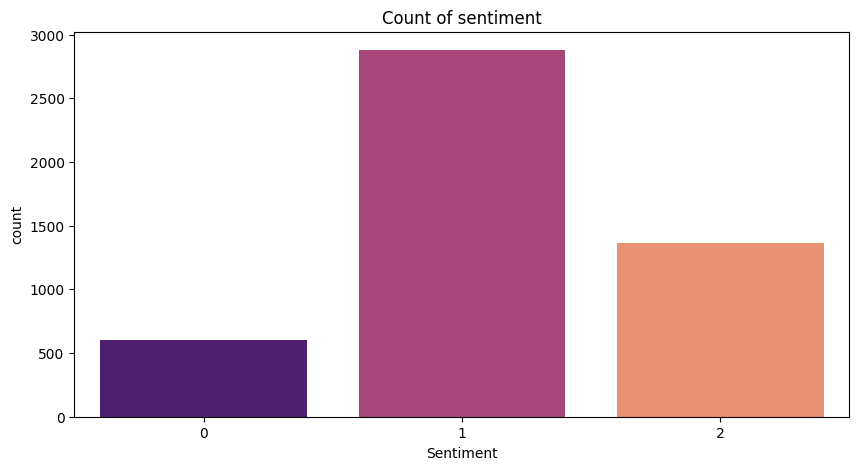

In [ ]:
#Barplot:
plt.figure(figsize=(10, 5))

x = df1["Sentiment"].value_counts()
display(x)
sns.barplot(x, palette="magma")

plt.title("Count of sentiment")
plt.show()

*OBSEVATION* : The Barplot shows the count of the each value in the Sentiment column and the Higest value_count is all about "0" (ie "neutral") and the second higest is 1 (ie "Positive)



In [ ]:
df1

,Sentiment,Message,token,lematization,stopwords
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla...","[accord, gran, company, plan, move, production..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an...","[technopolis, plan, develop, stage, area, less..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy...","[accord, company, update, strategy, year, 2009..."
...,...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per...","[rinkuskiai, beer, sale, fall, 6.5, per, cent,..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f...","[operating, profit, fall, eur, 35.4, mn, eur, ..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,...","[net, sale, paper, segment, decrease, eur, 221..."


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


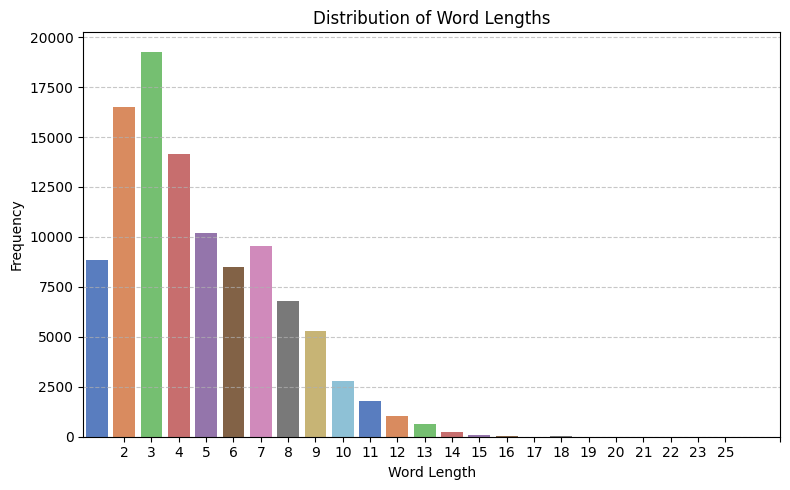

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns # Import seaborn

# Sample text
text = df["token"]

# Flatten the list of lists into a single list of words
all_words = [word for sublist in text for word in sublist]

# Split into words and compute lengths
word_lengths = [len(word) for word in all_words]

# Count frequency of each length
length_counts = Counter(word_lengths)

# Sort by word length
lengths = sorted(length_counts.keys())
frequencies = [length_counts[length] for length in lengths]

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=lengths, y=frequencies, palette="muted") # Use sns.barplot
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.xticks(lengths)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

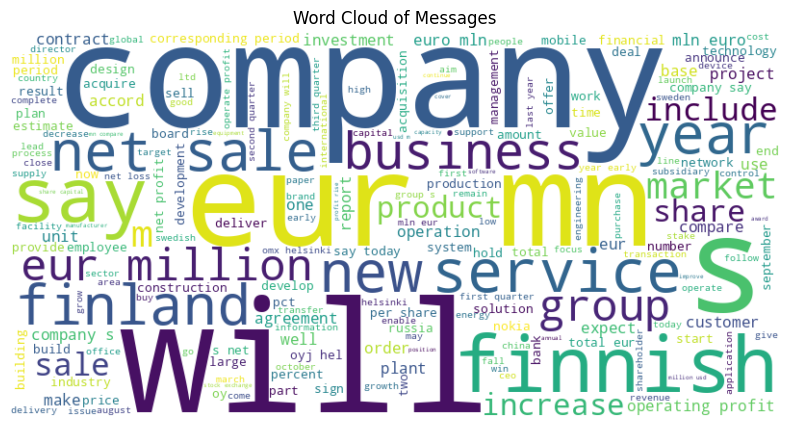

In [ ]:
'''lematization'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=''
for i in df1['lematization']:
  temp=" ".join(i)
  text=text+' '+temp

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Messages")
plt.show()

OBSEVATION : It shows the most repeated words in the given column

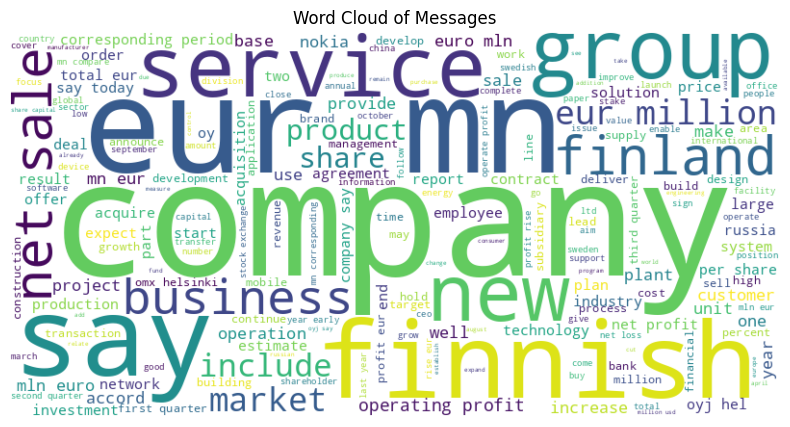

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=''
for i in df1['stopwords']:
  temp=" ".join(i)
  text=text+' '+temp

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Messages")
plt.show()

OBSEVATION : It shows the most repeated words in the given column

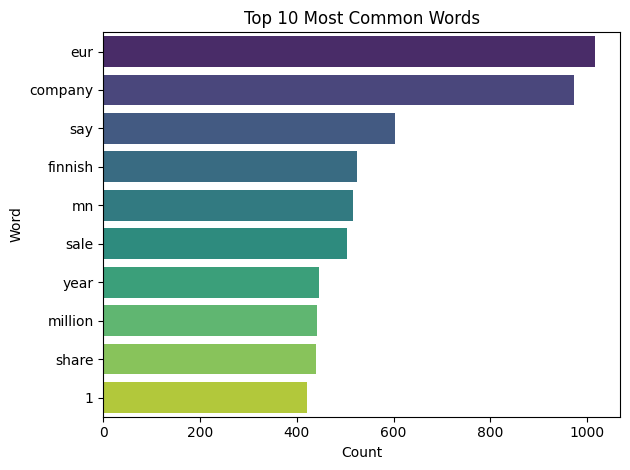

In [ ]:
from collections import Counter
import re

# Clean and tokenize text
words = re.findall(r'\b\w+\b', text.lower())
common_words = Counter(words).most_common(10)
words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

sns.barplot(x='Count', y='Word', data=words_df,  palette="viridis")
plt.title("Top 10 Most Common Words")
plt.tight_layout()
plt.show()


OBSERVATION : Its shows the top-10 of most common words with count of it

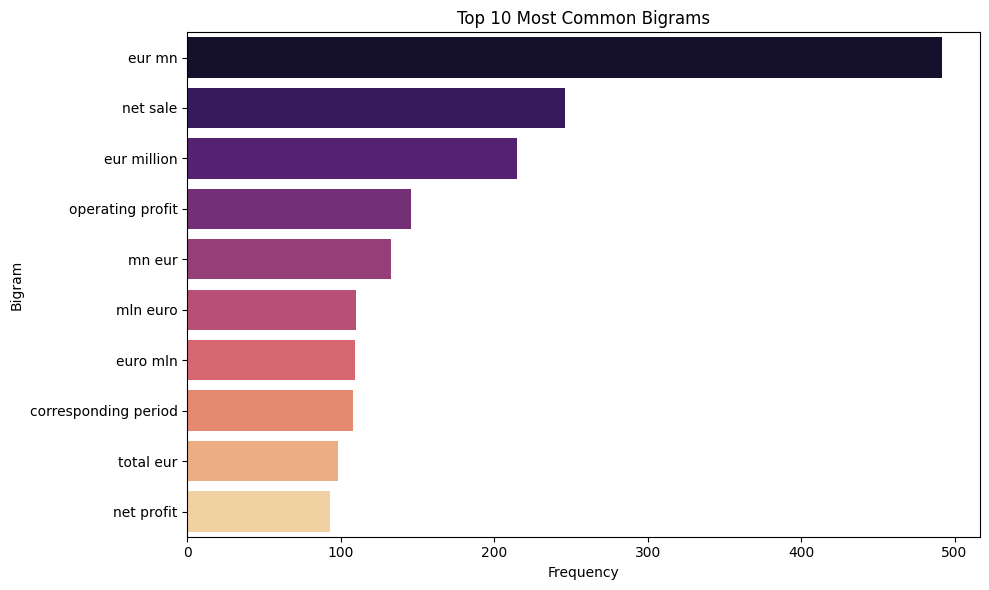

In [ ]:
from collections import Counter
from nltk.util import bigrams


# Step 1: Flatten all bigrams from the tokenized column
all_bigrams = []

for tokens in df1["stopwords"]:
    # Only use alphabetic tokens (optional cleanup)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    bigrams_in_row = list(bigrams(tokens))  # create bigrams
    all_bigrams.extend(bigrams_in_row)

# Step 2: Count bigram frequency
bigram_counts = Counter(all_bigrams)

# Step 3: Get top N bigrams
top_n = 10
most_common_bigrams = bigram_counts.most_common(top_n)

# Step 4: Prepare for plotting
bigram_df = pd.DataFrame(most_common_bigrams, columns=["bigram", "count"])
bigram_df["bigram"] = bigram_df["bigram"].apply(lambda x: " ".join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="bigram", data=bigram_df, palette="magma")
plt.title("Top 10 Most Common Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

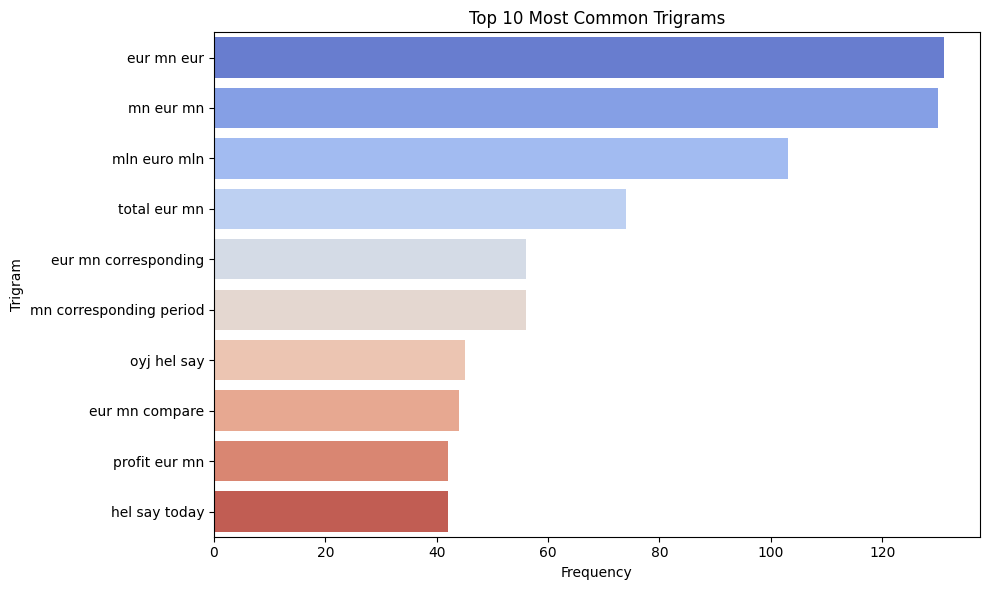

In [ ]:
import pandas as pd
from collections import Counter
from nltk.util import trigrams
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten all trigrams from the tokenized column
all_trigrams = []

for tokens in df1["stopwords"]:
    # Optional: clean tokens, keep only alphabetic and lowercase
    tokens = [t.lower() for t in tokens if t.isalpha()]
    trigrams_in_row = list(trigrams(tokens))  # create trigrams
    all_trigrams.extend(trigrams_in_row)

# Step 2: Count trigram frequency
trigram_counts = Counter(all_trigrams)

# Step 3: Get top N trigrams
top_n = 10
most_common_trigrams = trigram_counts.most_common(top_n)

# Step 4: Prepare for plotting
trigram_df = pd.DataFrame(most_common_trigrams, columns=["trigram", "count"])
trigram_df["trigram"] = trigram_df["trigram"].apply(lambda x: " ".join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="trigram", data=trigram_df, palette="coolwarm")
plt.title("Top 10 Most Common Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.tight_layout()
plt.show()


##EDA is completed !


In [ ]:
df


,Sentiment,Message,token,lematization,stopwords
0,1,"according to gran , the company has no plans t...","[according, to, gran, the, company, has, no, p...","[accord, to, gran, the, company, have, no, pla...","[accord, gran, company, plan, move, production..."
1,1,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an...","[technopolis, plan, develop, stage, area, less..."
2,0,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,2,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,2,according to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra...","[accord, to, the, company, s, update, strategy...","[accord, company, update, strategy, year, 2009..."
...,...,...,...,...,...
4841,0,london marketwatch -- share prices ended lower...,"[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower...","[london, marketwatch, share, price, end, lower..."
4842,1,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, s, beer, sales, fell, by, 6.5, pe...","[rinkuskiai, s, beer, sale, fall, by, 6.5, per...","[rinkuskiai, beer, sale, fall, 6.5, per, cent,..."
4843,0,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f...","[operating, profit, fall, eur, 35.4, mn, eur, ..."
4844,0,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,...","[net, sale, paper, segment, decrease, eur, 221..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(df['stopwords'])

df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())



df_bow


,.,...,.0,.00,.01,.02,.02.2011,.03,.04,.045,...,zloty,zoltan,zone,zoo,zte,zu,â,ænekoski,ðl,õ
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_bow,df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
BOW_model = LogisticRegression()
BOW_model.fit(x_train,y_train)
y_pred=BOW_model.predict(x_test)

In [ ]:
print("BOW using Logistic Regression")
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))


BOW using Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.50      0.57       115
           1       0.75      0.87      0.81       567
           2       0.70      0.55      0.62       287

    accuracy                           0.73       969
   macro avg       0.71      0.64      0.67       969
weighted avg       0.73      0.73      0.72       969



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7327141382868937


In [ ]:
print(accuracy_score(BOW_model.predict(x_train),y_train))

0.9891640866873065


In [ ]:
import spacy

input1=input('Enter a sentence : ')
def bow_pre(input1):
  input1=input1.lower()
  print(input1)

  nlp=spacy.load("en_core_web_sm")
  doc = nlp(input1)
  tokens = [token.text for token in doc]
  print(tokens)

  cleaned=[]
  for i in tokens:
      if re.match(r'^([A-Za-z]\.){1,}[A-Za-z]?$', i) or re.match(r'^[A-Za-z]+(-[A-Za-z]+)+$', i):
          cleaned.append(i)
      elif re.match(r'^\d+\.\d+$', i):
          cleaned.append(i)
      else:
          cleaned_token = re.sub(r'[^\w\.]', '', i)
          if cleaned_token:
              cleaned.append(cleaned_token)

  print(cleaned)

  doc_text = " ".join(cleaned)
  spacy_doc = nlp(doc_text)

  lemmas = [token.lemma_ for token in spacy_doc]
  lemmas=[i.lower() for i in lemmas]
  print(lemmas)

  filtered = [word for word in lemmas if word not in stop_words]
  print(filtered)

  li=[]
  for i in df_bow.columns:
    if i in filtered:
      li.append(filtered.count(i))
    else:
      li.append(0)
  print(li)
  return(li)
prac=bow_pre(input1)
prac=pd.DataFrame([prac])
sol=BOW_model.predict(prac)
print(li.count(0))
if sol[0]==-1:
  print('Negative')
elif sol[0]==1:
  print('Positive')
elif sol[0]==0:
  print('Neutral')
else:
  print('ERROR')

Enter a sentence : stock falls by 50%.
stock falls by 50%.
['stock', 'falls', 'by', '50', '%', '.']
['stock', 'falls', 'by', '50', '.']
['stock', 'fall', 'by', '50', '.']
['stock', 'fall', '50', '.']
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
'''#installing the LG:
!pip install -U spacy
!python -m spacy download en_core_web_lg'''

'#installing the LG:\n!pip install -U spacy\n!python -m spacy download en_core_web_lg'

In [ ]:
import spacy


input1=input('Enter a sentence : ')
def bow_pre(input1):
  input1=input1.lower()
  print(input1)

  nlp=spacy.load("en_core_web_lg")
  doc = nlp(input1)
  tokens = [token.text for token in doc]
  print(tokens)

  cleaned = []

  for i in tokens:
      if re.match(r'^([A-Za-z]\.){1,}[A-Za-z]?$', i) or re.match(r'^[A-Za-z]+(-[A-Za-z]+)+$', i):
          cleaned.append(i)
      elif re.match(r'^\d+\.\d+$', i):
          cleaned.append(i)
      else:
          cleaned_token = re.sub(r'[^\w\.]', '', i)
          if cleaned_token:
              cleaned.append(cleaned_token)

  print(cleaned)

  doc_text = " ".join(cleaned)
  spacy_doc = nlp(doc_text)

  lemmas = [token.lemma_ for token in spacy_doc]
  lemmas=[i.lower() for i in lemmas]
  print(lemmas)

  filtered = [word for word in lemmas if word not in stop_words]
  print(filtered)

  li=[]
  for i in df_bow.columns:
    if i in filtered:
      li.append(filtered.count(i))
    else:
      li.append(0)
  print(li)
  return(li)
prac=bow_pre(input1)
prac=pd.DataFrame([prac])
sol=BOW_model.predict(prac)
print(li.count(1))
if sol[0]==-1:
  print('Negative')
elif sol[0]==1:
  print('Positive')
elif sol[0]==0:
  print('Neutral')
else:
  print('ERROR')

Enter a sentence : stock markets are fallen by 20%.
stock markets are fallen by 20%.


OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install gensim --upgrade --quiet

In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy==1.24.4 gensim --no-cache-dir --force-reinstall


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 208.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 219.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 240.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 189.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 219.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled 

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')



w2v_model = Word2Vec(sentences=df['token'], vector_size=100, window=3, min_count=2, workers=4, epochs=20)


vocab = w2v_model.wv.key_to_index
embedding_dim = 100
embedding_matrix = np.zeros((len(vocab) + 2, embedding_dim))
word_to_idx = {word: idx + 2 for idx, word in enumerate(vocab)}
for word, idx in word_to_idx.items():
    embedding_matrix[idx] = w2v_model.wv[word]

class FinancialDataset(Dataset):
    def __init__(self, texts, labels, word_to_idx, max_len=30):
        self.texts = texts
        self.labels = labels
        self.word_to_idx = word_to_idx
        self.max_len = max_len

    def encode(self, tokens):
        idxs = [self.word_to_idx.get(token, 1) for token in tokens]
        if len(idxs) < self.max_len:
            idxs += [0] * (self.max_len - len(idxs))
        return idxs[:self.max_len]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(self.encode(self.texts[idx]), dtype=torch.long), torch.tensor(self.labels[idx])


X_train, X_val, y_train, y_val = train_test_split(df['token'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)
train_ds = FinancialDataset(X_train.tolist(), y_train.tolist(), word_to_idx)
val_ds = FinancialDataset(X_val.tolist(), y_val.tolist(), word_to_idx)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float)


class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim=128, output_dim=3):
        super().__init__()
        num_embeddings, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding(num_embeddings, embedding_dim, padding_idx=0)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True  # enable fine-tuning

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        out = self.dropout(h_n[-1])
        return self.fc(out)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(embedding_matrix).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

best_f1 = 0
patience, patience_counter = 3, 0

for epoch in range(32):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_dl:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = model(x_batch)
        loss = loss_fn(preds, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_dl):.4f}")

    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x_batch, y_batch in val_dl:
            x_batch = x_batch.to(device)
            outputs = model(x_batch)
            preds = torch.argmax(outputs, dim=1).cpu().tolist()
            y_pred.extend(preds)
            y_true.extend(y_batch.tolist())


    report = classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"], digits=4)
    print(report)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1, Loss: 1.0500
              precision    recall  f1-score   support

    Negative     0.2347    0.7273    0.3548       121
     Neutral     0.7447    0.6736    0.7074       576
    Positive     0.2329    0.0625    0.0986       272

    accuracy                         0.5088       969
   macro avg     0.4041    0.4878    0.3869       969
weighted avg     0.5374    0.5088    0.4925       969

Epoch 2, Loss: 0.9890
              precision    recall  f1-score   support

    Negative     0.3514    0.5372    0.4248       121
     Neutral     0.7051    0.9132    0.7958       576
    Positive     0.3947    0.0551    0.0968       272

    accuracy                         0.6254       969
   macro avg     0.4837    0.5018    0.4391       969
weighted avg     0.5738    0.6254    0.5532       969

Epoch 3, Loss: 0.9241
              precision    recall  f1-score   support

    Negative     0.3127    0.7107    0.4343       121
     Neutral     0.7389    0.8698    0.7990       576
    Posit

In [ ]:
print("Word2Vec using LSTM")
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"], digits=4)
print(report)

# Save to file
with open("classification_report.txt", "w") as f:
    f.write(report)


Word2Vec using LSTM
              precision    recall  f1-score   support

    Negative     0.6496    0.6281    0.6387       121
     Neutral     0.8352    0.6597    0.7371       576
    Positive     0.5038    0.7353    0.5979       272

    accuracy                         0.6770       969
   macro avg     0.6628    0.6744    0.6579       969
weighted avg     0.7190    0.6770    0.6858       969



In [ ]:
def predict_sentiment(text, model, word_to_idx, max_len=30):
    model.eval()
    tokens = word_tokenize(text.lower())
    idxs = [word_to_idx.get(token, 1) for token in tokens]
    idxs = idxs[:max_len] + [0] * max(0, max_len - len(idxs))
    input_tensor = torch.tensor([idxs], dtype=torch.long).to(device)

    with torch.no_grad():
        logits = model(input_tensor)
        pred_index = torch.argmax(logits, dim=1).item()
        return {0: "Negative", 1: "Neutral", 2: "Positive"}[pred_index]

# Example
print(predict_sentiment(input('Enter the Statement : '), model, word_to_idx))


Enter the Statement : stock market increases by 20%.
Positive


In [ ]:
'''!pip uninstall -y numpy
!pip install numpy==1.24.4 --no-cache-dir --force-reinstall
'''

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 128.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


In [ ]:
'''!pip install --upgrade --force-reinstall tensorflow'''


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 878.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 k

In [ ]:
'''!pip install numpy==1.24.4'''
!pip install gensim==4.3.1
!pip install tensorflow==2.12


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp311-cp311-manylinux2014_x86_64.whl.metadata (1

In [ ]:
import pandas as pd
import numpy as np
import random
import nltk
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
df_main = pd.read_csv('/content/all-data.csv', delimiter=',', encoding='latin-1')
df_main = df_main.rename(columns={"neutral": "Sentiment",
                                 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': "Message"})
index = {"negative": 0, "positive": 2, "neutral": 1}
df_main['Sentiment'] = [index[i] for i in df_main['Sentiment']]

# Clean text function
def cleanText(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\|\|\|', ' ', text)
    text = re.sub(r'http\S+|www\S+', '<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

df_main['Message'] = df_main['Message'].apply(cleanText)

# Split the data into train and test
train, test = train_test_split(df_main, test_size=0.2, random_state=42)

# Tokenize the text for building vocabulary
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[str(r.Sentiment)]), axis=1)

# Build the vocabulary with Doc2Vec model
d2v_model = Doc2Vec(vector_size=20, window=5, min_count=1, workers=4, epochs=40)
d2v_model.build_vocab([x for x in train_tagged.values])
d2v_model.train([x for x in train_tagged.values], total_examples=len(train_tagged), epochs=d2v_model.epochs)

# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_main['Message'].values)
vocab_size = len(tokenizer.word_index) + 1  # +1 for OOV tokens

# Create the embedding matrix
embedding_dim = 20
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    try:
        embedding_vector = d2v_model.dv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        # If word not in Doc2Vec vocab, leave as zeros or initialize randomly
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))

# Tokenize and pad sequences
MAX_SEQUENCE_LENGTH = 50
X_train = tokenizer.texts_to_sequences(train['Message'].values)
X_test = tokenizer.texts_to_sequences(test['Message'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Prepare labels (convert to one-hot encoding)
y_train = to_categorical(train['Sentiment'], num_classes=3)
y_test = to_categorical(test['Sentiment'], num_classes=3)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                   output_dim=embedding_dim,
                   input_length=MAX_SEQUENCE_LENGTH,
                   weights=[embedding_matrix],
                   trainable=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(3, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test accuracy: {score[1]}")

ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00
